     ---------------------------------------- 7.2/7.2 MB 317.0 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 764.1 kB/s eta 0:00:00
     ------------------------------------ 103.2/103.2 kB 853.3 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 851.0 kB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 734.8 kB/s eta 0:00:00


Index(['Species', 'Length to Width Ratio (L/W)',
       'Length to Patiole Ratio (L/P)', 'Length to Angle Ratio (L/A)',
       'Width to Patiole Ratio (W/P)', 'Width to Angle Ratio (W/A)'],
      dtype='object')
Number of classes: 3
168
(168, 5)
42
(42, 5)
168
(168, 3)
42
(42, 3)
Epoch 1/50
5/5 [==============================] - 1s 66ms/step - loss: 1.1843 - accuracy: 0.2657 - val_loss: 0.9859 - val_accuracy: 0.8000
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 0.9253 - accuracy: 0.6573 - val_loss: 0.7438 - val_accuracy: 0.8800
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.7355 - accuracy: 0.8252 - val_loss: 0.5582 - val_accuracy: 0.9200
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5889 - accuracy: 0.9790 - val_loss: 0.4132 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 0.4679 - accuracy: 0.9860 - val_loss: 0.3004 - val_accuracy: 1.0000
Epoch 6/50
5/5 [===========

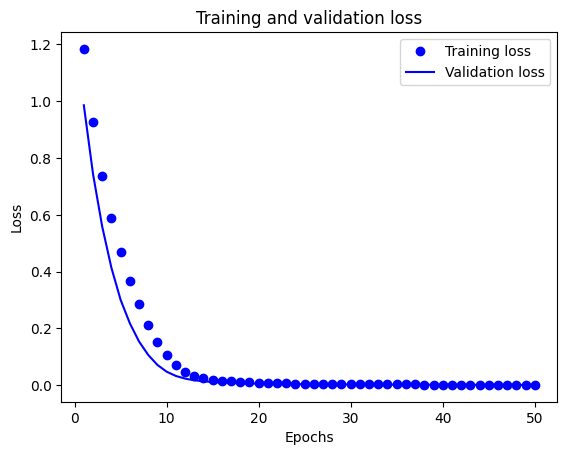

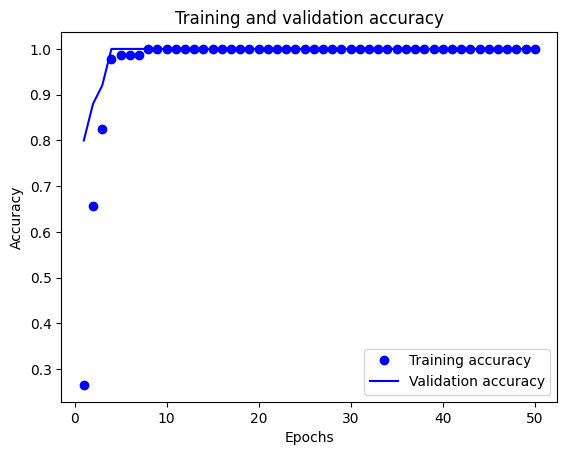

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('Treesss.csv')
print(df.columns)

# Split features and target variable
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Verify the number of classes
num_classes = len(df.iloc[:, 0].unique())
print(f'Number of classes: {num_classes}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the data (standardize the features)
scaler = StandardScaler()
X_train_vectorized = scaler.fit_transform(X_train)
X_test_vectorized = scaler.transform(X_test)

# Label encode the labels
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train), num_classes=num_classes)
y_test_encoded = to_categorical(le.transform(y_test), num_classes=num_classes)

print(len(X_train_vectorized))
print(X_train_vectorized.shape)
print(len(X_test_vectorized))
print(X_test_vectorized.shape)
print(len(y_train_encoded))
print(y_train_encoded.shape)
print(len(y_test_encoded))
print(y_test_encoded.shape)

# Create a neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Ensure this matches the number of classes

learning_rate = 0.002  # Adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


X_val = X_train_vectorized[:25]
partial_X_train_vectorized = X_train_vectorized[25:]
y_val = y_train_encoded[:25]
partial_y_train_encoded = y_train_encoded[25:]

# Train the model with validation data
history = model.fit(
    partial_X_train_vectorized,
    partial_y_train_encoded,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test_vectorized, y_test_encoded, verbose=0)
print(f'Test accuracy: {test_acc}')

# Extract training and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Extract training and validation accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

2/2 [==============================] - 0s 0s/step
(3,)
0.99999994
First ten predictions:
Sample 1: [9.9984622e-01 1.0527216e-04 4.8455197e-05]
Sample 2: [3.5772424e-05 7.0564834e-05 9.9989361e-01]
Sample 3: [2.2711384e-07 9.9999899e-01 7.1471806e-07]
Sample 4: [9.9973381e-01 1.6063407e-04 1.0555345e-04]
Sample 5: [3.2880043e-06 7.0438036e-06 9.9998957e-01]
Sample 6: [9.9958199e-01 2.5695673e-04 1.6106016e-04]
Sample 7: [9.9909556e-01 4.5971409e-04 4.4467152e-04]
Sample 8: [9.9964476e-01 2.2451009e-04 1.3066902e-04]
Sample 9: [1.3843637e-05 5.4609191e-05 9.9993151e-01]
Sample 10: [0.00164094 0.9959727  0.00238631]
First ten predicted classes:
Sample 1: 0
Sample 2: 2
Sample 3: 1
Sample 4: 0
Sample 5: 2
Sample 6: 0
Sample 7: 0
Sample 8: 0
Sample 9: 2
Sample 10: 1
2/2 [==============================] - 0s 0s/step
Frist 10 predictions and their classified results
Sample1:Prediction-[9.9984622e-01 1.0527216e-04 4.8455197e-05],Classified as-[1 0 0]
Sample2:Prediction-[3.5772424e-05 7.0564834e

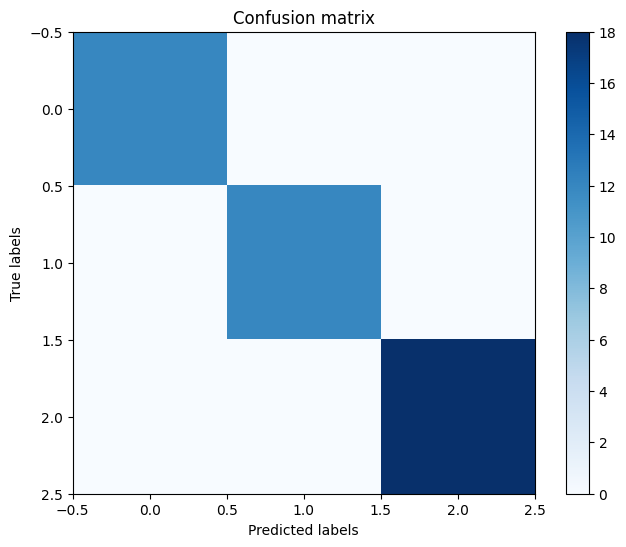

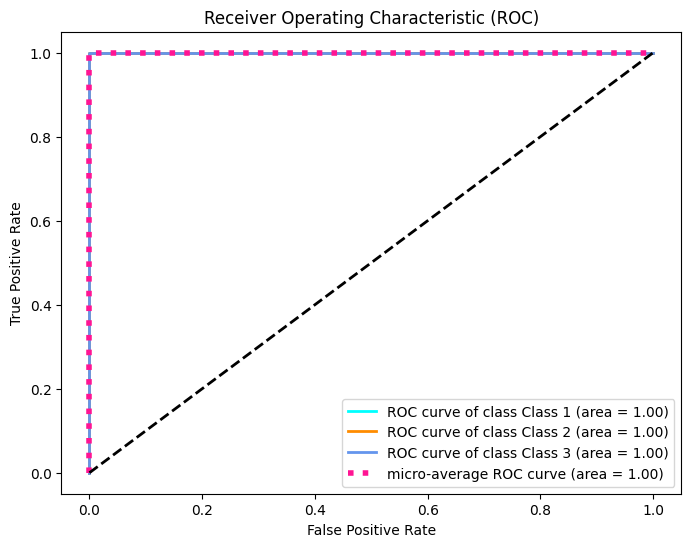

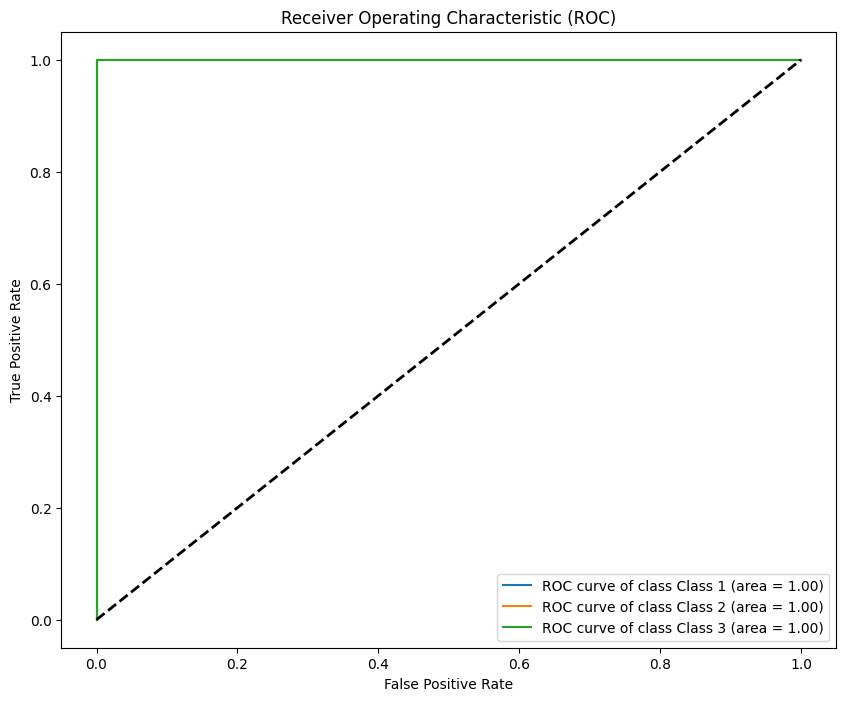

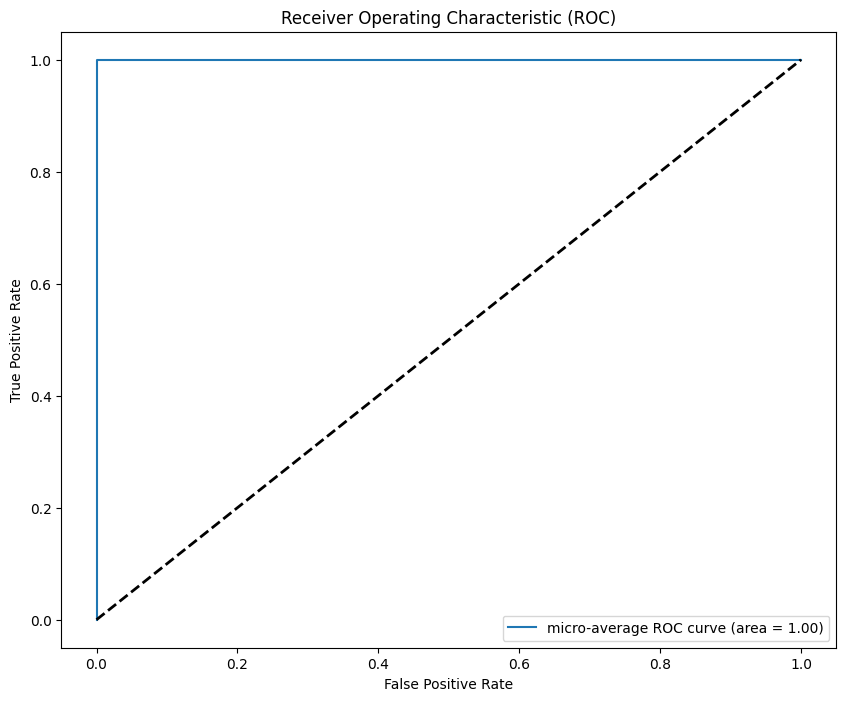

In [33]:
import numpy as np

# Predict on the test data
predictions = model.predict(X_test_vectorized)

# Check the shape of the first prediction
print(predictions[0].shape)

# Verify that the sum of the probabilities for the first prediction is 1 (for a properly implemented softmax)
print(np.sum(predictions[0]))

# Get the first ten predictions
first_ten_predictions = predictions[:10]

print("First ten predictions:")
for i, prediction in enumerate(first_ten_predictions, start=1):
    print(f"Sample {i}: {prediction}")

# If you also want to see the predicted classes for the first ten samples
predicted_classes = np.argmax(predictions, axis=1)
first_ten_predicted_classes = predicted_classes[:10]

print("First ten predicted classes:")
for i, predicted_class in enumerate(first_ten_predicted_classes, start=1):
    print(f"Sample {i}: {predicted_class}")
predictions=model.predict(X_test_vectorized)
first_ten_predictions=predictions[:10]
classes=(first_ten_predictions>0.5).astype(int)
print("Frist 10 predictions and their classified results")
for i,(prediction,cls)in enumerate(zip(first_ten_predictions,classes),start=1):
    print(f"Sample{i}:Prediction-{prediction},Classified as-{cls}")
predictions = model.predict(X_test_vectorized)
first_ten_predictions = predictions[:10]
classes = np.argmax(first_ten_predictions, axis=1)
labels = ["Class 1" if cls == 0 else "Class 2" if cls == 1 else "Class 3" for cls in classes]
print("First 10 predictions and their classified results, and labels:")
for i, (prediction, cls, label) in enumerate(zip(first_ten_predictions, classes, labels), start=1):
    print(f"Sample {i}: Prediction - {prediction}, Classified as - {cls} ({label})")
# Predictions
predictions = model.predict(X_test_vectorized)

# Getting the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Printing the results
print("First 10 predictions and their classified results:")
for i, (prediction, cls) in enumerate(zip(predictions[:10], predicted_classes), start=1):
    print(f"Sample {i}: Prediction - {prediction}, Classified as class {cls}")

# Printing the class labels
labels = ["Class 1", "Class 2", "Class 3"]
predicted_labels = [labels[cls] for cls in predicted_classes]
print("Predicted class labels:")
for i, label in enumerate(predicted_labels[:10], start=1):
    print(f"Sample {i}: {label}")

# Convert predictions to labels
predicted_labels = le.inverse_transform(predictions.argmax(axis=1))

# Convert true labels to numeric format
#y_test_numeric = le.transform(y_test)

# Display classification report
print(classification_report(y_test, predicted_labels))

# Plot confusion matrix
plt.figure(figsize=(8,6))
plt.imshow(confusion_matrix(y_test, predicted_labels), cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.colorbar()
plt.show()
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle



# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=le.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(le.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
# Plot AUC for each class
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(le.classes_[i], roc_auc[i]))

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot micro-average AUC
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()